In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import EMA
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'gm'
stock = Stock(ticker)
stock.load_data()
stock.snip_dates('2020-01-01', '2021-12-31')

In [3]:
%%time
# Calculate EMA signals
ema_signal = EMA(stock)

CPU times: user 105 ms, sys: 2.87 ms, total: 108 ms
Wall time: 109 ms


In [6]:
stock.signal[stock.signal < 0]

2020-03-06   -1.0
2020-03-11   -1.0
2020-03-16   -1.0
2020-03-19   -1.0
2020-03-24   -1.0
2020-03-30   -1.0
2020-04-02   -1.0
2021-05-12   -1.0
2021-08-04   -1.0
2021-08-19   -1.0
2021-08-24   -1.0
2021-08-27   -1.0
2021-09-01   -1.0
2021-12-20   -1.0
dtype: float64

In [7]:
%%time
# Run simulation
sim = Simulation(ema_signal.stock_obj)
sim.paper_trade()

CPU times: user 19.4 s, sys: 581 ms, total: 20 s
Wall time: 20.9 s


In [8]:
sim.calc_pnl()

gm simulation PnL: $106,997


In [9]:
doberplot = DoberPlot(stock)

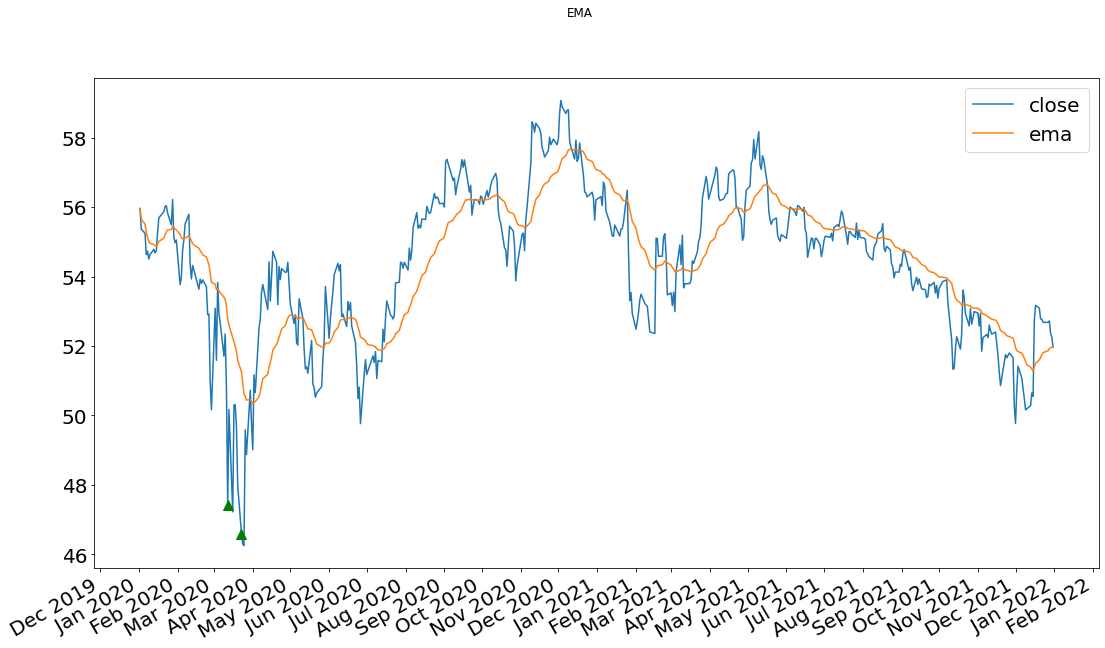

In [7]:
doberplot.order_signal(strategy_name='ema')

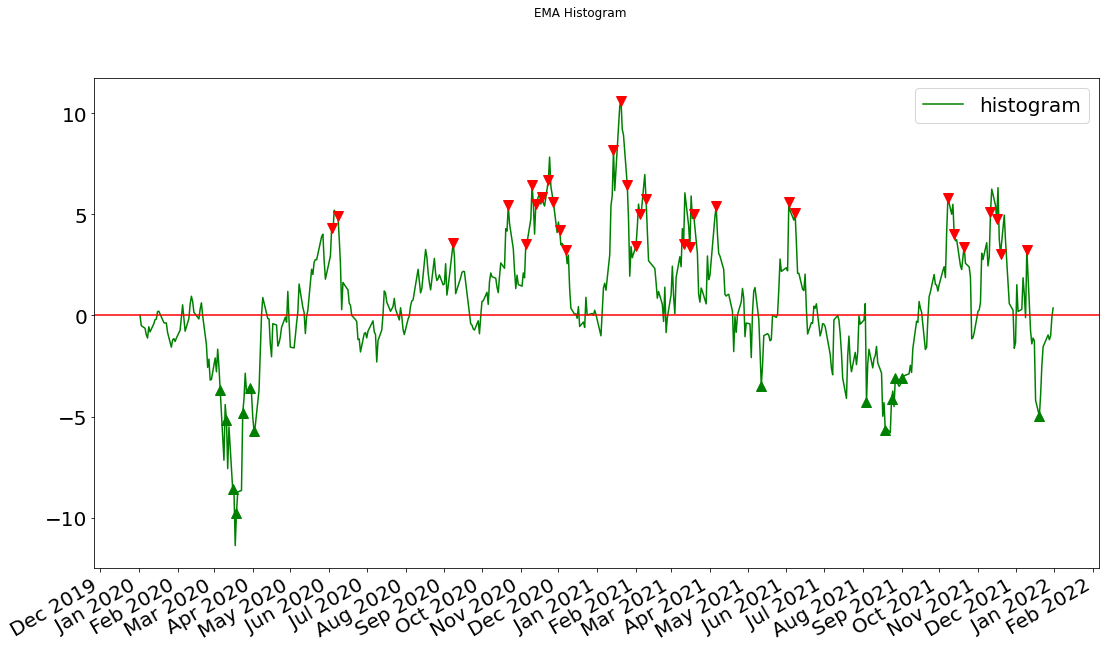

In [10]:
doberplot.histogram(strategy_name='ema')